This notebook plots some basic statistics about the growth rate of COVID-19 literature

In [32]:
import time
import tqdm
import numpy
from matplotlib import pyplot as plt
from datetime import datetime, timedelta
from indra.literature import pubmed_client

def reldate_to_date(reldate):
    return datetime.today() - timedelta(days=reldate)

In [37]:
search_term = 'COVID-19'
reldates = list(range(450, -1, -5))
dates = [reldate_to_date(rd) for rd in reldates]
data = []
for reldate in tqdm.tqdm(reldates):
    ids = pubmed_client.get_ids(search_term, reldate=reldate, retmax=200000)
    data.append(len(ids))
    time.sleep(0.5)

100%|██████████| 91/91 [01:52<00:00,  1.24s/it]


In [45]:
cum_sum = list(data[0] - numpy.array(data[:-1])) + [data[0]]

In [74]:
date_strs = [date.strftime('%m/%d/%Y') for date in dates]

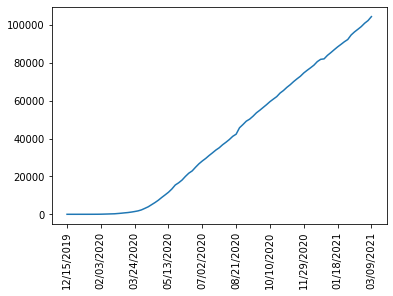

In [75]:
plt.xticks(ticks=range(0, len(date_strs), 10), labels=date_strs[::10], rotation='vertical')
plt.plot(cum_sum)

Taking out the initial ramp up, plot how many papers were published per day

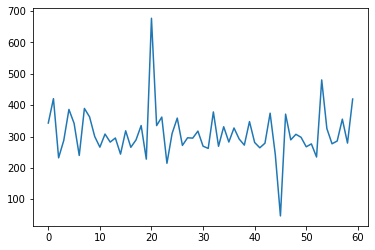

In [76]:
plt.plot(numpy.diff(cum_sum[30:]) / 5)

In [77]:
print('Average number of papers published per day: %d' % numpy.mean(numpy.diff(cum_sum[30:]) / 5))

Average number of papers published per day: 309


In [78]:
print('Total number of papers published so far: %d' % data[0])

Total number of papers published so far: 104436
